In [1]:
import numpy as np
from numpy import pi as π
from numpy.fft import rfft, irfft, rfftfreq

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

#### Function and true derivative

In [2]:
n = 128
L = 30
dx = L / n
x = np.arange(-L/2, L/2, dx)

# Function
f = np.cos(x) * np.exp(-x**2 / 25)

# True derivative
df_true = -(
    np.sin(x) * np.exp(-x**2 / 25) + (2 / 25) * x * f
)

#### Approximate derivative using finite difference

In [3]:
df_fd = np.diff(f, append=f[-1]) / dx

#### Derivative using FFT (spectral derivative)

In [4]:
f̂ = rfft(f)
κ = 2*π * rfftfreq(n, dx)
df̂ = 1j * κ * f̂
df_fft = irfft(df̂)

#### Plots - Figure 2.10

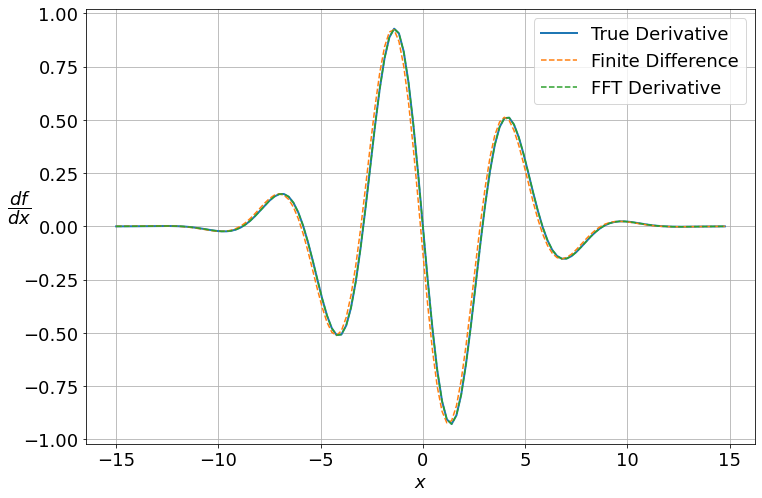

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, df_true, linewidth=2, label='True Derivative')
ax.plot(x, df_fd, '--', linewidth=1.5, label='Finite Difference')
ax.plot(x, df_fft, '--', linewidth=1.5, label='FFT Derivative')
ax.set_ylabel(r'$\dfrac{df}{dx}$', rotation=0)
ax.set_xlabel('$x$')
ax.legend()
ax.grid(True);